<a href="https://colab.research.google.com/github/chadeowen/DS-Unit-2-Sprint-2-Linear-Regression/blob/master/Linear_Regression_Sprint_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install seaborn==0.9.0

    100% |████████████████████████████████| 215kB 26.6MB/s 
  Found existing installation: seaborn 0.7.1
    Uninstalling seaborn-0.7.1:
      Successfully uninstalled seaborn-0.7.1
  [seaborn]
You must restart the runtime in order to use newly installed versions.


In [1]:
# Import everything you could ever need. ;)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats

/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
# Ukraine Used Car Sale Price Prediction
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/car_regression.csv')
print(df.shape)
df.head()

(8495, 9)


,make,price,body,mileage,engV,engType,registration,year,drive
0,23,15500.0,0,68,2.5,1,1,2010,1
1,50,20500.0,3,173,1.8,1,1,2011,2
2,50,35000.0,2,135,5.5,3,1,2008,2
3,50,17800.0,5,162,1.8,0,1,2012,0
4,55,16600.0,0,83,2.0,3,1,2013,1


In [3]:
# check for non numerics

df.dtypes

make              int64
price           float64
body              int64
mileage           int64
engV            float64
engType           int64
registration      int64
year              int64
drive             int64
dtype: object

In [4]:
# check for nulls

df.isna().sum()

make            0
price           0
body            0
mileage         0
engV            0
engType         0
registration    0
year            0
drive           0
dtype: int64

# Predictive Modeling with Linear Regression

## 1.1 Divide the dataset features into an X matrix and y vector ("price" is what we want to predict).

In [0]:
y = df['price']
X = df.drop(columns=['price'], axis=1)

## 1.2 Split the data into test and train datasets using train_test_split

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.5, random_state=42)

print(X.shape, "\n")

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

X_train.head()

(8495, 8) 

(4247, 8)
(4248, 8)
(4247,)
(4248,)


,make,body,mileage,engV,engType,registration,year,drive
166,42,2,155,3.6,0,1,2008,1
6044,76,3,999,1.3,3,1,1984,2
1006,77,5,1,2.2,0,1,2013,0
6129,67,3,0,1.2,3,1,2016,0
5920,34,0,49,3.5,3,1,2009,1


## 1.3 Use Scikit-Learn to fit a multiple regression model using your training data.

In [7]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## 1.4 Report the Intercept and Coefficient Values for the fitted model

In [8]:
print("Coefficient: \n", model.coef_)
print("\n Intercept: ", model.intercept_)

Coefficient: 
 [  -35.22479484 -1672.11973555   -37.12848399   269.61582544
 -1284.74375962  4649.46225339  1098.2829573   7886.89079148]

 Intercept:  -2184591.0115608736


## 1.5 Use the test data to make predictions

In [0]:
y_test_predict = model.predict(X_test)

*We can see that two of our coefficients have little effect (make and mileage). Our other coefficients are either extremely high both positively and negatively, with an extremely negative intercept. This leads me to believe that there is a lot of noise and our R^2 value is not going to be as high as we would like it to be*

## 1.6 Calculate and report both the Root-Mean-Square error and $R^2$ for the model. 

In [10]:
MSE = mean_squared_error(Y_test, y_test_predict)

RMSE = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))

print('MSE is {}'.format(MSE))
print('RMSE is {}'.format(RMSE))

R2 = r2_score(Y_test, y_test_predict)

print('R^2 is {}'.format(R2))

MSE is 504905647.2241802
RMSE is 22470.10563446866
R^2 is 0.2694482951962195


## 1.7 How should we interpret the coefficient corresponding to the "year" feature?

*For each year newer car A is than car B value is driven upwards by nearly $1,100*

## 1.8 How should we interpret the Root-Mean-Square Error?

*The RMSE is the standard deviation of the residuals. Higher values of RMSE indicate worse fit, and as we can see here, our RMSE is much too high, indicating our predicted values are not very close to the actual datapoints.*

## 1.9 How should we interpret the $R^2$?

*Our R^2 is low, as predicted in section 1.5. This means that our independent variables are not reliable datapoints to accurately predict the price of this group of cars*

# Log-Linear and Polynomial Regression

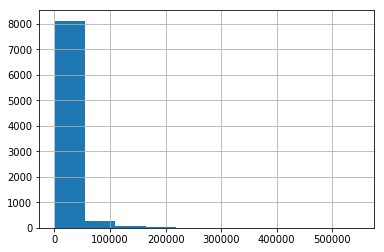

In [11]:
# lets just check out the distribution first

df['price'].hist();

# positively skewed

## 2.1 Engineer a new variable by taking the log of the price varible.

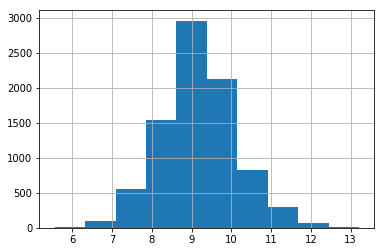

In [12]:
# log the target variable
# hopefully this will show a bit more of a normal dist

df['ln_price'] = np.log(df['price'])

df['ln_price'].hist();

# much better

## 2.2 Use scatterplots or seaborn's pairplot function to do the "eyeball test" for non-linearly distributed features.

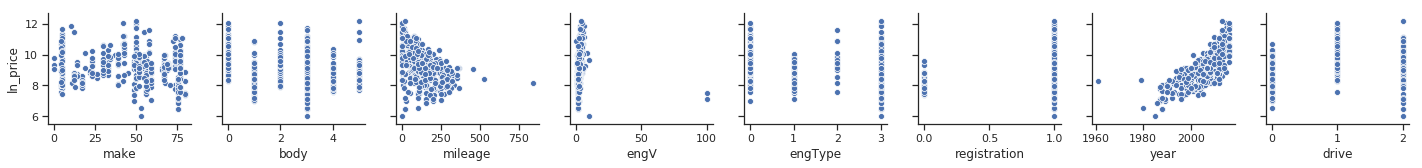

In [14]:
sns.set(style="ticks", color_codes=True)

# Generate a list of column headers not including price
x_columns = df.columns.drop(['ln_price','price'])

# Sample our dataframe to take 1/20th the values
sampled = df.sample(frac=0.05, replace=True)

# Only plot the scatterplot of x variables with our logged y variable
sns.pairplot(data=sampled, y_vars=['ln_price'], x_vars=x_columns);

## 2.3 If appropriate, create any polynomial features. 

In [15]:
# create polynomial features for curved data variables
## excluding outliers for engV gives a slight curve

df['mileage_squared'] = df['mileage']**2
df['engV_squared'] = df['engV']**2
df['year_squared'] = df['year']**2

df.head()

,make,price,body,mileage,engV,engType,registration,year,drive,ln_price,mileage_squared,engV_squared,year_squared
0,23,15500.0,0,68,2.5,1,1,2010,1,9.648595,4624,6.25,4040100
1,50,20500.0,3,173,1.8,1,1,2011,2,9.928180,29929,3.24,4044121
2,50,35000.0,2,135,5.5,3,1,2008,2,10.463103,18225,30.25,4032064
3,50,17800.0,5,162,1.8,0,1,2012,0,9.786954,26244,3.24,4048144
4,55,16600.0,0,83,2.0,3,1,2013,1,9.717158,6889,4.00,4052169


## 2.4 Use the new log-transformed y variable and your x variables (including any new polynomial features) to fit a new linear regression model. Then report the: intercept, coefficients, RMSE, and $R^2$.

In [16]:
y_poly = df['ln_price']
X_poly = df.drop(columns=['ln_price','price'], axis=1)

X_poly_train, X_poly_test, Y_poly_train, Y_poly_test = train_test_split(X_poly, y_poly, test_size=.5, random_state=42)

# print(X_poly.shape, "\n")

# print(X_poly_train.shape)
# print(X_poly_test.shape)
# print(Y_poly_train.shape)
# print(Y_poly_test.shape, '\n')

X_poly_train.head()

model_poly = LinearRegression()
model_poly.fit(X_poly_train, Y_poly_train)

print("Coefficient: \n", model_poly.coef_)
print("\n Intercept: ", model_poly.intercept_)

Coefficient: 
 [-1.05515669e-03 -6.57571779e-02  7.09632695e-04  2.47321727e-01
 -4.39394050e-02  7.04259856e-01 -6.66530005e+00  2.65628332e-01
 -3.71262611e-07 -2.47463746e-03  1.68924967e-03]

 Intercept:  6580.85471963619


In [17]:
y_poly_test_predict = model_poly.predict(X_poly_test)

MSE_poly = mean_squared_error(Y_poly_test, y_poly_test_predict)

RMSE_poly = (np.sqrt(mean_squared_error(Y_poly_test, y_poly_test_predict)))

# print('MSE is {}'.format(MSE_poly))
print('RMSE is {}'.format(RMSE_poly))

R2_poly = r2_score(Y_poly_test, y_poly_test_predict)

print('R^2 is {}'.format(R2_poly))

RMSE is 0.4940062703650954
R^2 is 0.7407820089149335


In [18]:
# had to make sure my year column was correct, the coefficient sign flipped when comparing to logged price...

df.head()

,make,price,body,mileage,engV,engType,registration,year,drive,ln_price,mileage_squared,engV_squared,year_squared
0,23,15500.0,0,68,2.5,1,1,2010,1,9.648595,4624,6.25,4040100
1,50,20500.0,3,173,1.8,1,1,2011,2,9.928180,29929,3.24,4044121
2,50,35000.0,2,135,5.5,3,1,2008,2,10.463103,18225,30.25,4032064
3,50,17800.0,5,162,1.8,0,1,2012,0,9.786954,26244,3.24,4048144
4,55,16600.0,0,83,2.0,3,1,2013,1,9.717158,6889,4.00,4052169


## 2.5 How might we interpret the coefficient on "year" in this new regression model?

*For every year newer a car is, the logged price will decrease by $6.67*

# Gradient Descent

## 3.1 What does Gradient Descent seek to minimize?

*Gradient Descent seeks to minimize theta. By minimizing theta, the multivariate linear model will provide the smallest loss value, or difference between predicted and actual value. This in turn finds the optimal values of a function minimum, therefore being named the Minimal Gradient Descent Implementation.*

## 3.2 What is the "Learning Rate" and what is its function?

*The 'Learning Rate' or 'Alpha' is the size of the steps taken. Gradient Descent seeks to minimize theta by measuring slopes, and how large of a step we move before taking our next slope measurement is the Learning Rate/Alpha.*

*Wikipedia perfectly explains the positives and negatives of using a high alpha versus using a low alpha: "With a high learning rate we can cover more ground each step, but we risk overshooting the lowest point since the slope of the hill is constantly changing. With a very low learning rate, we can confidently move in the direction of the negative gradient since we are recalculating it so frequently. A low learning rate is more precise, but calculating the gradient is time-consuming, so it will take us a very long time to get to the bottom."*

*Finding the negative gradient with the highest alpha possible will ensure we achieve the negative gradient efficiently.*

# Model Diagnostics

## 4.1 Use statsmodels to run a log-linear or log-polynomial linear regression with robust standard errors.

In [20]:
y_stats = df['ln_price']
X_stats = df.drop(columns=['ln_price','price'], axis=1)

# Use Statsmodels to run a regression

X_stats = sm.add_constant(X_stats)

model_stats = sm.OLS(y_stats, X_stats).fit(cov_type='HC3')
predictions = model_stats.predict(X_stats) 

print_model = model_stats.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:               ln_price   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     2005.
Date:                Fri, 18 Jan 2019   Prob (F-statistic):               0.00
Time:                        17:35:05   Log-Likelihood:                -5940.1
No. Observations:                8495   AIC:                         1.190e+04
Df Residuals:                    8483   BIC:                         1.199e+04
Df Model:                          11                                         
Covariance Type:                  HC3                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            6761.0314    717.406     

## 4.2 Calculate the Variance Inflation Factor (VIF) of our X variables. Do we have multicollinearity problems?

In [22]:
X_stats.columns

Index(['const', 'make', 'body', 'mileage', 'engV', 'engType', 'registration',
       'year', 'drive', 'mileage_squared', 'engV_squared', 'year_squared'],
      dtype='object')

In [21]:
vif = [variance_inflation_factor(X_stats.values, i) for i in range(X_stats.shape[1])]
print(vif)

[3418028612.877639, 1.0623312500833164, 1.189462098265078, 7.531883205787882, 23.658486876957284, 1.1717650011044476, 1.1089333083611264, 164046.1768639353, 1.2508066605599515, 5.071662262970101, 23.50312616122046, 164379.66005683382]


*We can exclude looking at the vif of a constant because it should be infinite, explained by our intercept. When vif scores are above a value of 10, that is when we can safely assume a collinearity problem. We have collinearity problems with four x variables: engV, year, engV_squared, year_squared*